<a href="https://colab.research.google.com/github/Chandusatyasai/Chandusatyasai/blob/cognifyz/RESTURANTRATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
from google.colab import files
uploaded = files.upload()
try:
  df = pd.read_csv('archive (2).zip')
except FileNotFoundError:
  print("Error: 'archive (2).zip' not found. Please check the uploaded filename.")

df.head()

Saving archive (2).zip to archive (2) (2).zip


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:

df.isnull().sum()
df = df.dropna()


In [6]:

label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [8]:
X = df.drop('close', axis=1)
y = df['close']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [11]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [12]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}\n')

evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_dt, 'Decision Tree Regression')


Linear Regression Performance:
Mean Squared Error: 0.00
R-squared: 1.00

Decision Tree Regression Performance:
Mean Squared Error: 16.58
R-squared: 1.00



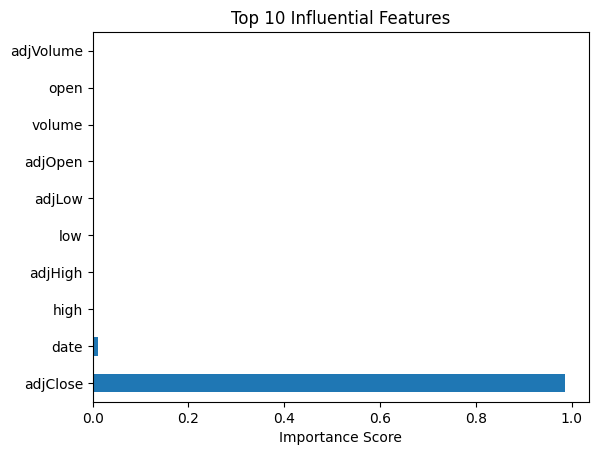

In [13]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Influential Features')
plt.xlabel('Importance Score')
plt.show()


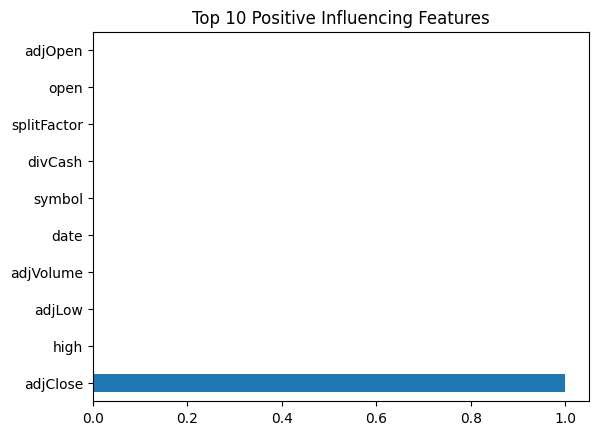

In [14]:
coefficients = pd.Series(lr.coef_, index=X.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.title('Top 10 Positive Influencing Features')
plt.show()
